In [76]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, make_scorer, cohen_kappa_score
import numpy as np
import matplotlib.pyplot as plt

# allow plots to appear directly in the notebook
%matplotlib inline

In [77]:
df = pd.read_csv("../data/regression-task/master-regression-dataset.csv", sep=';', lineterminator='\n')
df = df.drop(labels=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'High', 'Low', 'Close', 'Open', 'Volume', 'Timestamp'], axis=1)
df.head()

,Delta,Volatility,AvgVolatility,Momentum,positive_sentiment
0,-0.631500,0.000000,0.0,0.0,0.469450
1,0.418999,-0.005044,0.0,1.0,0.423330
2,1.206997,-0.042437,0.0,1.0,0.486872
3,0.843002,0.005326,0.0,0.0,0.505960
4,-0.531502,-0.000792,0.0,1.0,0.433893


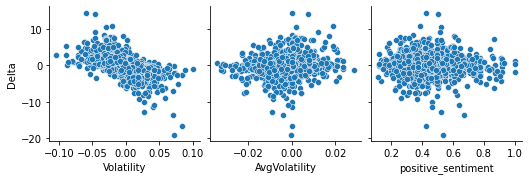

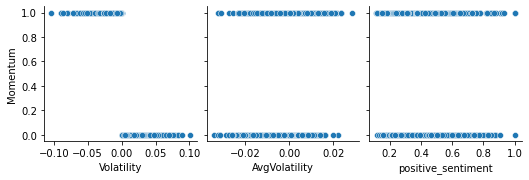

In [78]:
features = ['Volatility', 'AvgVolatility', 'positive_sentiment']


sns.pairplot(df, x_vars=features, y_vars='Delta')
sns.pairplot(df, x_vars=features, y_vars='Momentum')

In [79]:
# Classification
X_train, y_train = df[features], df['Momentum']
print(X_train.shape, y_train.shape)

(1675, 3) (1675,)


In [82]:
def plot_regression_validation_curve(X, y, hyperparams: list):
    train_scores = []
    test_scores = []
    for c in hyperparams:
        reg_clf = LogisticRegression(C=c)

        # get cross validation score
        # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
        cv_scores = cross_validate(reg_clf, X, y, cv=10, error_score='raise', scoring=make_scorer(accuracy_score), return_train_score=True)
        current_train_scores = cv_scores['train_score']
        current_test_scores = cv_scores['test_score']
        train_score = np.average(current_train_scores)
        test_score = np.average(current_test_scores)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f"Logistic Regression with c {c} has mean validation train / test score of {train_score} / {test_score}")

    plt.plot(hyperparams, train_scores, label='Train scores')
    plt.plot(hyperparams, test_scores, label='Test scores')
    plt.grid()
    plt.legend()
    plt.title("Logistic regression validation curve")
    plt.show()

def plot_regression_learning_curve(X, y, param=32):
    reg_clf = LogisticRegression(C=param)
    sample_points, train_scores, test_scores = learning_curve(estimator=reg_clf, X=X, y=y, cv=5, scoring=make_scorer(accuracy_score))
    train_scores = np.average(train_scores, axis=1)
    test_scores = np.average(test_scores, axis=1)

    print(sample_points)

    plt.plot(sample_points, train_scores, label='Train scores')
    plt.plot(sample_points, test_scores, label='Test scores')
    plt.legend()
    plt.grid()
    plt.title(f"Logistic regression learning curve, C = {param}")
    plt.show()

Logistic Regression with c 0.2 has mean validation train / test score of 0.5558209786689525 / 0.555827630453379
Logistic Regression with c 0.4 has mean validation train / test score of 0.5779765603135854 / 0.5779120330767038
Logistic Regression with c 0.6 has mean validation train / test score of 0.6131337137566687 / 0.6131308810949528
Logistic Regression with c 0.8 has mean validation train / test score of 0.6659364609716988 / 0.6650662959794695
Logistic Regression with c 1 has mean validation train / test score of 0.7025532924161164 / 0.7014720558882235
Logistic Regression with c 2 has mean validation train / test score of 0.8004636629416393 / 0.7999679213002567
Logistic Regression with c 4 has mean validation train / test score of 0.8750244658437459 / 0.8728008269175934
Logistic Regression with c 8 has mean validation train / test score of 0.9126366963014332 / 0.9116374394069003
Logistic Regression with c 16 has mean validation train / test score of 0.9381758249301667 / 0.9379098944

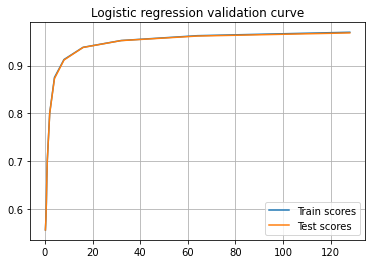

[ 134  435  737 1038 1340]


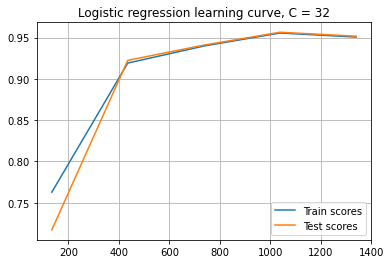

In [90]:
c_vals = [0.2, 0.4, 0.6, 0.8, 1, 2, 4, 8, 16, 32, 64, 128]
plot_regression_validation_curve(X_train, y_train, c_vals)
plot_regression_learning_curve(X_train, y_train, 32)